<a href="https://colab.research.google.com/github/Anwesha-dash811/MAPPING-GLOBAL-URBAN-POPULATION/blob/main/urban(task_2_1%262_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ****Mapping Global Urban Population using Geospatial Analysis****
For mapping urban global population, we are merging the world dataset, population dataset and global urban population and urban population per capita to plot the per capita maps for year 1990,2000,2010.We have used some different techniques of geopandas and diverging and cyclic colour shades to customize our map.Legends and orientation concept are used for the customization of our map and plotting it.

In [ ]:
#installing geopandas for the plotting of maps
!pip install geopandas

### **IMPORTING LIBRARIES FOR THE TASK**

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### **EXTRACTING WORLD,POPULATION AND WORLD URBAN POPULATION DATASET**

In [ ]:
#extracting world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#extracting population dataset
pop=pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1637443.csv', sep = ',', encoding='cp1252', skiprows=4)
#extracting world urban population dataset
urban = pd.read_csv('API_SP.URB.TOTL_DS2_en_csv_v2_1868968 (1).csv', sep = ',', encoding='cp1252', skiprows=4)
print("Datas for world, population and urban dataset are extracted")

Datas for world, population and urban dataset are extracted


#### **CONVERTING THE EXTRACTED DATA TO DATAFRAME**

In [ ]:
#Converting data in population dataset to dataframe
pop_df= pop[['Country Name','1990','2000','2010']].fillna(1)
pop_df.head(5)

,Country Name,1990,2000,2010
0,Aruba,62149.0,90853.0,101669.0
1,Afghanistan,12412308.0,20779953.0,29185507.0
2,Angola,11848386.0,16395473.0,23356246.0
3,Albania,3286542.0,3089027.0,2913021.0
4,Andorra,54509.0,65390.0,84449.0


In [ ]:
#Converting data in world urban population dataset to dataframe
urban_df = urban[['Country Name','1990','2000','2010']].fillna(0)
urban_df.head()

,Country Name,1990,2000,2010
0,Aruba,31273.0,42444.0,43778.0
1,Afghanistan,2628554.0,4587798.0,6927764.0
2,Angola,4400964.0,8212001.0,13963065.0
3,Albania,1197222.0,1289391.0,1519519.0
4,Andorra,51627.0,60417.0,75007.0


#### **MERGING POPULATION AND URBAN POPULATION DATFRAME**

In [ ]:
merge_df= pd.merge(urban_df,pop_df, on = 'Country Name')
merge_df.head()

,Country Name,1990_x,2000_x,2010_x,1990_y,2000_y,2010_y
0,Aruba,31273.0,42444.0,43778.0,62149.0,90853.0,101669.0
1,Afghanistan,2628554.0,4587798.0,6927764.0,12412308.0,20779953.0,29185507.0
2,Angola,4400964.0,8212001.0,13963065.0,11848386.0,16395473.0,23356246.0
3,Albania,1197222.0,1289391.0,1519519.0,3286542.0,3089027.0,2913021.0
4,Andorra,51627.0,60417.0,75007.0,54509.0,65390.0,84449.0


#### **CALCULATING URBAN PER CAPITA AND ADDING THE COLUMNS TO THE DATAFRAME**

In [ ]:
merge_df['1990_capita']=merge_df['1990_x']/merge_df['1990_y']
merge_df['2000_capita']=merge_df['2000_x']/merge_df['2000_y']
merge_df['2010_capita']=merge_df['2010_x']/merge_df['2010_y']
merge_df.head()

,Country Name,1990_x,2000_x,2010_x,1990_y,2000_y,2010_y,1990_capita,2000_capita,2010_capita
0,Aruba,31273.0,42444.0,43778.0,62149.0,90853.0,101669.0,0.503194,0.467172,0.430593
1,Afghanistan,2628554.0,4587798.0,6927764.0,12412308.0,20779953.0,29185507.0,0.211770,0.220780,0.237370
2,Angola,4400964.0,8212001.0,13963065.0,11848386.0,16395473.0,23356246.0,0.371440,0.500870,0.597830
3,Albania,1197222.0,1289391.0,1519519.0,3286542.0,3089027.0,2913021.0,0.364280,0.417410,0.521630
4,Andorra,51627.0,60417.0,75007.0,54509.0,65390.0,84449.0,0.947128,0.923949,0.888193


#### **MERGING ALL THE THREE DATASETS**

In [ ]:
df=pd.merge(world,merge_df, left_on='name', right_on='Country Name') 
print("ALL THE DATASETS ARE MERGED TO A SINGLE DATAFRAME")

ALL THE DATASETS ARE MERGED TO A SINGLE DATAFRAME


### ***TASK 2.1***
**PLOTTING GLOBAL URBAN POPULATION PER CAPITA FOR THE YEAR 1990,2000,2010 USING CHLOROPLETH MAPS**

###### ****PLOT FOR 1990****

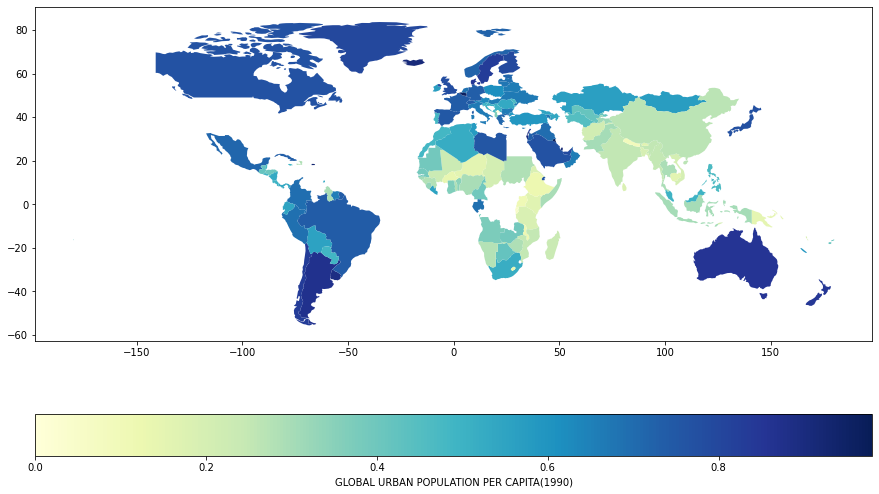

In [ ]:
df.plot(column='1990_capita',cmap='YlGnBu',figsize=(15,9), k=3, legend=True,legend_kwds={'label': "GLOBAL URBAN POPULATION PER CAPITA(1990)",'orientation': "horizontal"})

###### ****PLOT FOR 2000****

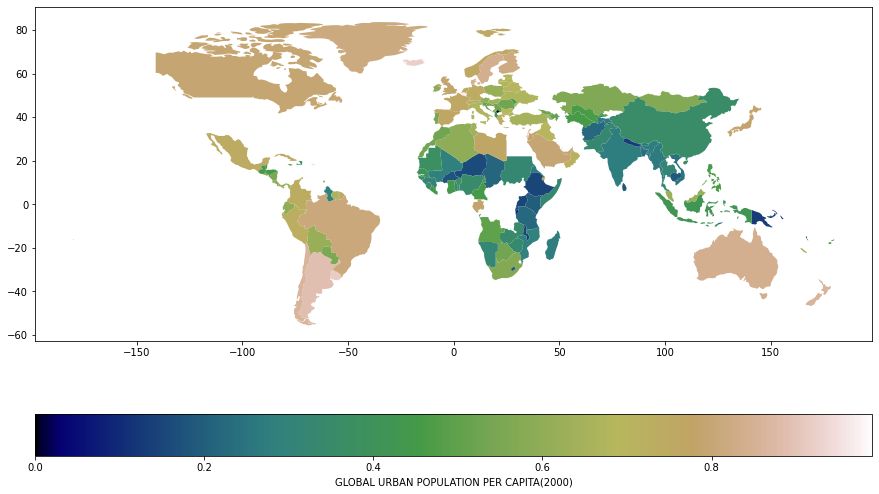

In [ ]:
df.plot(column='2000_capita',cmap='gist_earth',figsize=(15,9), k=3, legend=True,legend_kwds={'label': "GLOBAL URBAN POPULATION PER CAPITA(2000)",'orientation': "horizontal"})

###### ****PLOT FOR 2010****

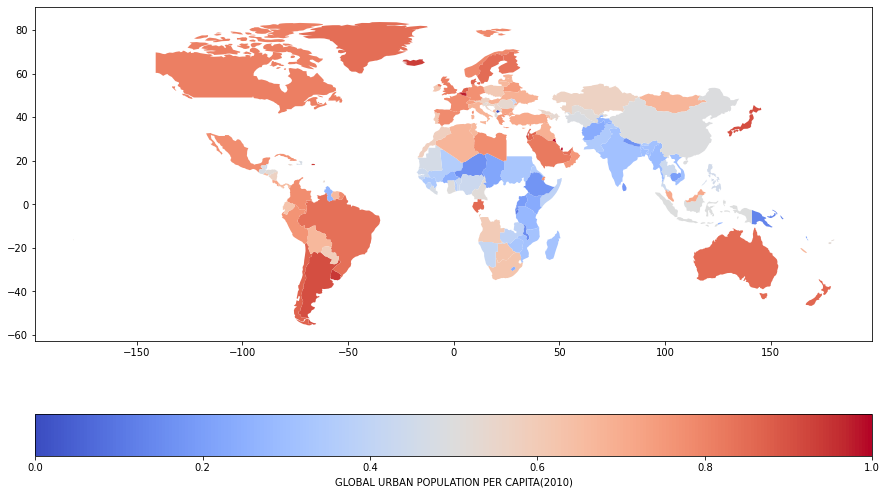

In [ ]:
df.plot(column='2010_capita',cmap='coolwarm',figsize=(15,9), k=3, legend=True,legend_kwds={'label': "GLOBAL URBAN POPULATION PER CAPITA(2010)",'orientation': "horizontal"})

### **TASK 2.2**

#### **For year 2010, plot the urban population per capita for only the countries having population greater than 290000000. Very briefly interpret the generated plot.**

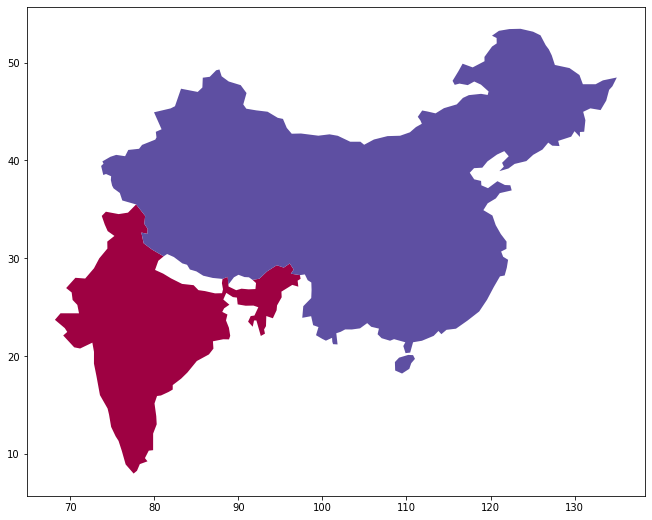

In [ ]:
pl1= df[df['pop_est'] >= 290000000.]
pl1.plot(cmap='Spectral',figsize=(15,9))

#### **For year 2010, plot the urban population per capita for only the countries having population less than 69000000. Very briefly interpret the generated plot.**

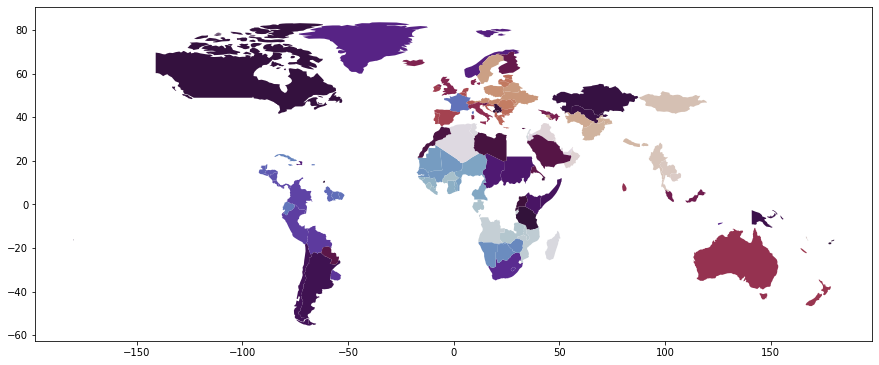

In [ ]:
pl2= df[df['pop_est'] <= 69000000]
pl2.plot(cmap='twilight_shifted',figsize=(15,9))

#### **For year 2010, plot the urban population per capita for only the countries having urban population between 110146163 and 223096279. Very briefly interpret the generated plot.**

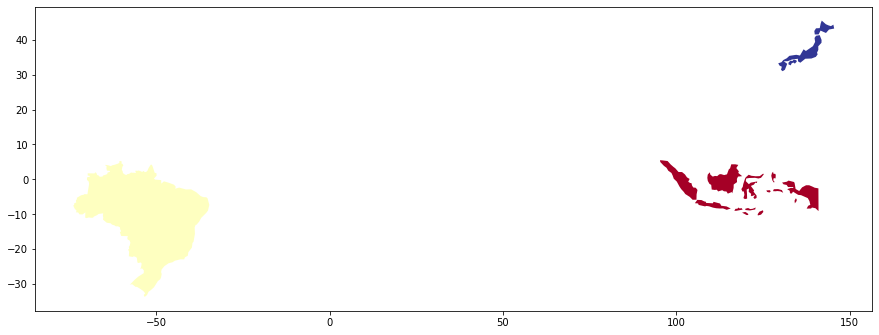

In [ ]:
pl3= df[(df['2010_x'] >= 110146163 ) & (df['2010_x'] <= 223096279)]
pl3.plot(cmap='RdYlBu',figsize=(15,9))

#### **What is the percentage change in the urban population per capita from 1990 to 2010, for the country having the highest population in 2010?**

In [ ]:
maximum = df[df['2010_y'] == df['2010_y'].max()]
maximum['name']
#finding the percentage change from the maximum dataframe
percentage=((maximum['2010_capita']-maximum['1990_capita'])/maximum['2010_capita'])*100
print(percentage )
print("The percentage change of global urban population per capita of China from 1990 to 2010 is",percentage.to_string(),"%" )

116    46.284484
dtype: float64
The percentage change of global urban population per capita of China from 1990 to 2010 is 116    46.284484 %


#### **Plot the mean per capita world urban population (from 1990 to 2010) of all the countries. Very briefly interpret the generated plot. In this question, you have to consider the world urban population per capita for each year between 1990 and 2010 for calculating their mean values.**

In [ ]:
#finding urban population per capita of all countries from 1990 to 2010 
urb_capita= urban_df.loc[:, '1990':'2010'].fillna(1)/pop_df.loc[:, '1990':'2010'].fillna(1)

In [ ]:
urb_capita_mean= pd.concat([urban_df['Country Name'], urb_capita], axis=1)
urb_capita_mean['urb_mean'] = urb_capita_mean.mean(axis=1)
urb_capita_mean.head()

,Country Name,1990,2000,2010,urb_mean
0,Aruba,0.503194,0.467172,0.430593,0.466987
1,Afghanistan,0.211770,0.220780,0.237370,0.223307
2,Angola,0.371440,0.500870,0.597830,0.490047
3,Albania,0.364280,0.417410,0.521630,0.434440
4,Andorra,0.947128,0.923949,0.888193,0.919756


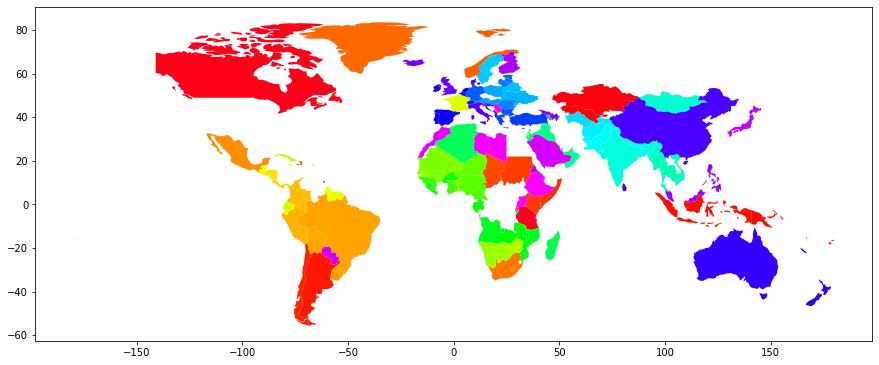

In [ ]:
#plotting mean per capita of all countries in the map
mean_capita= pd.merge(world,urb_capita_mean, left_on='name', right_on='Country Name')
mean_capita.plot(cmap='gist_rainbow',figsize=(15,9))

#### **Present a correlation plot between mean world population and mean per capita world urban population (from 1990 to 2010). Very briefly interpret the generated plot. In this question, you have to consider each year between 1990 and 2010 to find the mean population and mean per capita urban population.**

In [ ]:
mean= pop.loc[:, '1990':'2010'].fillna(0)
mean= pd.concat([pop['Country Name'], mean], axis=1)
mean['mean_popu'] = mean.mean(axis=1)
mean.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_popu
0,Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,8.812062e+04
1,Afghanistan,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,2.129546e+07
2,Angola,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,1.683680e+07
3,Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,3.095489e+06
4,Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,6.963281e+04


In [ ]:
correlate = pd.concat([pop['Country Name'], urb_capita_mean['urb_mean'], mean['mean_popu']], axis=1)
correlate ['population_mean'] = correlate['mean_popu']/1e6
correlate.max()

Country Name          Zimbabwe
urb_mean                     1
mean_popu          6.10848e+09
population_mean        6108.48
dtype: object

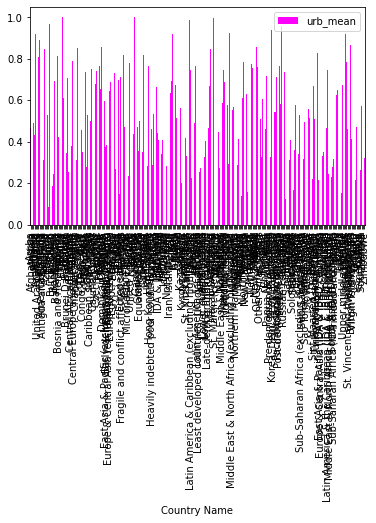

In [ ]:
#plotting the country name vs mean urban population graph
ax = plt.gca()
correlate.plot(kind='bar',x='Country Name',y='urb_mean',ax=ax,color='magenta')

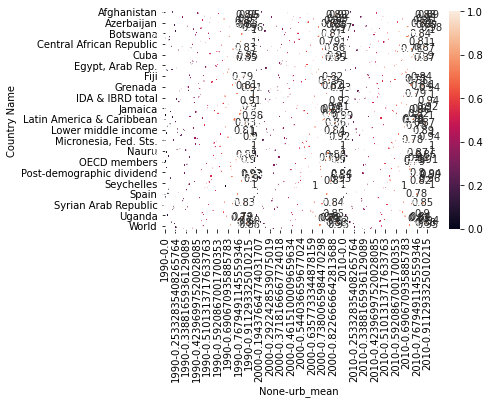

In [ ]:
#plotting the correlation heatmap
x_df = urb_capita_mean.pivot("Country Name","urb_mean")
ax = sns.heatmap(x_df,annot=True)